## Homework #2

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

Load the data.

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("housing.csv")

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Look at the `median_house_value` variable. Does it have a long tail? 

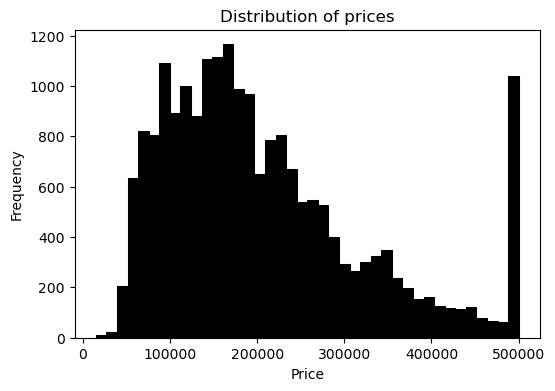

In [31]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [34]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


Yes, it has a long tail 

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [35]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [36]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [37]:
df[df['ocean_proximity']=='INLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [38]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [39]:
df = df.reset_index()

In [40]:
df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
15682,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
15683,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
15684,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
15685,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [41]:
df = df.drop('index', axis=1)

In [42]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [51]:
dfn = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

dfn


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?

In [52]:
dfn.isnull().sum()
#total_bedrooms

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

* `total_bedrooms`

### Question 2

What's the median (50% percentile) for variable `'population'`?

In [53]:
dfn['population'].median()
#1195.0

1195.0

- 1195

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [60]:
dfn.shape

(15687, 9)

In [61]:
np.random.seed(42)

n = len(dfn)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = dfn.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [63]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [64]:
log_mhv = np.log1p(df.median_house_value)
log_mhv

0        12.973866
1        12.287657
2        12.419574
3        12.554971
4        12.287196
           ...    
15682    11.265758
15683    11.252872
15684    11.432810
15685    11.346883
15686    11.400887
Name: median_house_value, Length: 15687, dtype: float64

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [65]:
dfn.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [70]:
dfn.total_bedrooms.mean()

541.2446877012235

In [71]:
dff=dfn.fillna(0)
dfg=dfn.fillna(dfn.total_bedrooms.mean())


In [73]:
dff.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [74]:
dfg.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [137]:
np.random.seed(42)

n = len(dff)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = dff.iloc[idx]

df_trainz = df_shuffled.iloc[:n_train].copy()
df_valz = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_testz = df_shuffled.iloc[n_train+n_val:].copy()

## Linear Regression without Regularization - using zero to fill

In [138]:
y_train_orig = df_trainz.median_house_value.values
y_val_orig = df_valz.median_house_value.values
y_test_orig = df_testz.median_house_value.values

y_trainz = np.log(df_trainz.median_house_value.values)
y_valz = np.log(df_valz.median_house_value.values)
y_testz = np.log(df_testz.median_house_value.values)

del df_trainz['median_house_value']
del df_valz['median_house_value']
del df_testz['median_house_value']

In [106]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [139]:
df_trainz.shape

(9413, 8)

In [142]:
w_0, w = train_linear_regression(df_trainz, y_trainz)

In [143]:
w

array([-2.68235498e-01, -2.55940884e-01,  1.77710328e-03, -3.38396409e-05,
        2.93768357e-04, -1.52191312e-04,  3.96911076e-04,  1.80602057e-01])

In [144]:
y_predz = w_0 + df_trainz.dot(w)

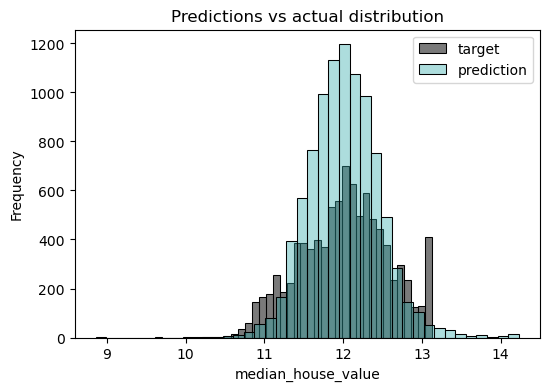

In [147]:
plt.figure(figsize=(6, 4))

sns.histplot(y_trainz, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_predz, label='prediction', color='#33aaaa', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('median_house_value')
plt.title('Predictions vs actual distribution')

plt.show()

In [112]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [148]:
score= rmse(y_trainz, y_predz)
round(score,2)

0.34

## Linear Regression without Regularization - using mean to fill

In [131]:
np.random.seed(42)

n = len(dfg)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = dfg.iloc[idx]

df_trainm = df_shuffled.iloc[:n_train].copy()
df_valm = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_testm = df_shuffled.iloc[n_train+n_val:].copy()

In [132]:
y_train_orim = df_trainm.median_house_value.values
y_val_orim = df_valm.median_house_value.values
y_test_orim = df_testm.median_house_value.values

y_train = np.log(df_trainm.median_house_value.values)
y_val = np.log(df_val.median_house_value.values)
y_test = np.log(df_test.median_house_value.values)

del df_trainm['median_house_value']
del df_valm['median_house_value']
del df_testm['median_house_value']

In [133]:
w_0, w = train_linear_regression(df_trainm, y_train)

In [154]:
df_trainm

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
15377,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080
15225,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
5231,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546
2076,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [134]:
w

array([-2.68656240e-01, -2.57030167e-01,  1.79885839e-03, -3.87709835e-05,
        3.78926205e-04, -1.49637085e-04,  3.25246097e-04,  1.81955243e-01])

In [135]:
y_predm = w_0 + df_trainm.dot(w)

In [136]:
score=rmse(y_train, y_predm)
round(score, 2)

0.34

Both are equally good

## regularized linear regression.

In [128]:
dff

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [188]:
np.random.seed(42)

n = len(dff)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = dff.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [189]:
r = 10

In [190]:
y_train_origi = df_train.median_house_value.values
y_val_origi = df_val.median_house_value.values
y_test_origi = df_test.median_house_value.values

y_train = np.log(df_train.median_house_value.values+r)
y_val = np.log(df_val.median_house_value.values+r)
y_test = np.log(df_test.median_house_value.values+r)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [191]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
15377,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080
15225,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
5231,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546
2076,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [192]:
w_0, w = train_linear_regression(df_train, y_train)

In [193]:
y_pred = w_0 + df_train.dot(w)
score=rmse(y_train, y_pred)
round(score, 2)

0.34